<a href="https://colab.research.google.com/github/kingy434/Sam-portfolio/blob/main/thechase/the_chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions to consider:
- Is there any correlation between age and the fast round sum?
- Is there any correlation between gender and the fast round sum?
- Are men or women more likely to choose the higher/lower offer?
- Which age groups are more likely to choose the higher/lower offer?


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("thechase.csv")
data.head()

,p_1_gender,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p1_round_status,p_2_gender,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_2_round_status,...,p_3_round_status,p_4_gender,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,p_4_round_status,team_total_sum,question_answered,game_result,season
0,male,30,20000,20000,1,female,27,50000,50000,1,...,1,female,30,30000,30000,0,105000,19,0,1
1,male,45,35000,35000,1,female,67,30000,30000,0,...,1,male,33,50000,160000,1,215000,23,0,1
2,female,33,25000,25000,1,male,57,20000,20000,1,...,1,male,32,40000,140000,0,60000,23,0,1
3,male,34,35000,35000,1,female,29,30000,30000,1,...,1,male,32,20000,90000,0,90000,24,1,1
4,male,50,30000,90000,0,female,38,35000,35000,1,...,1,male,30,25000,25000,0,70000,18,0,1


In [ ]:
data.dtypes

p_1_gender             object
p_1_age                 int64
p_1_fast_round_sum      int64
p_1_play_sum_chosen     int64
p1_round_status         int64
p_2_gender             object
p_2_age                 int64
p_2_fast_round_sum      int64
p_2_play_sum_chosen     int64
p_2_round_status        int64
p_3_gender             object
p_3_age                 int64
p_3_fast_round_sum      int64
p_3_play_sum_chosen     int64
p_3_round_status        int64
p_4_gender             object
p_4_age                 int64
p_4_fast_round_sum      int64
p_4_play_sum_chosen     int64
p_4_round_status        int64
team_total_sum          int64
question_answered       int64
game_result             int64
season                  int64
dtype: object

In [ ]:
encoders = {"p_1_gender": {"male": 0, "female": 1},
            "p_2_gender": {"male": 0, "female": 1},
            "p_3_gender": {"male": 0, "female": 1},
            "p_4_gender": {"male": 0, "female": 1}}
team_data = data.replace(encoders)
team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   p_1_gender           101 non-null    int64
 1   p_1_age              101 non-null    int64
 2   p_1_fast_round_sum   101 non-null    int64
 3   p_1_play_sum_chosen  101 non-null    int64
 4   p1_round_status      101 non-null    int64
 5   p_2_gender           101 non-null    int64
 6   p_2_age              101 non-null    int64
 7   p_2_fast_round_sum   101 non-null    int64
 8   p_2_play_sum_chosen  101 non-null    int64
 9   p_2_round_status     101 non-null    int64
 10  p_3_gender           101 non-null    int64
 11  p_3_age              101 non-null    int64
 12  p_3_fast_round_sum   101 non-null    int64
 13  p_3_play_sum_chosen  101 non-null    int64
 14  p_3_round_status     101 non-null    int64
 15  p_4_gender           101 non-null    int64
 16  p_4_age              101 n

In [ ]:
columns = ['gender', 'age', 'fast_round', 'play_sum', 'round_status']
values = {x: np.concatenate((team_data.iloc[:,i], team_data.iloc[:,i+5], 
                    team_data.iloc[:,i+10], team_data.iloc[:,i+15])) for i, x in enumerate(columns)}

ind_data = pd.DataFrame(data = values)
ind_data.head()

,gender,age,fast_round,play_sum,round_status
0,0,30,20000,20000,1
1,0,45,35000,35000,1
2,1,33,25000,25000,1
3,0,34,35000,35000,1
4,0,50,30000,90000,0


In [ ]:
higher_df = ind_data[ind_data['fast_round'] < ind_data['play_sum']]
lower_df = ind_data[ind_data['fast_round'] > ind_data['play_sum']]

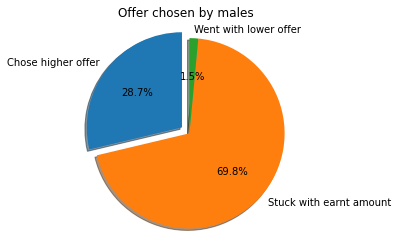

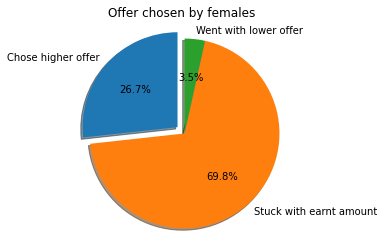

In [ ]:
male_higher_per = (higher_df['gender'].value_counts()[0] /  ind_data['gender'].value_counts()[0]) * 100
female_higher_per = (higher_df['gender'].value_counts()[1] /  ind_data['gender'].value_counts()[1]) * 100
male_lower_per = (lower_df['gender'].value_counts()[0] /  ind_data['gender'].value_counts()[0]) * 100
female_lower_per = (lower_df['gender'].value_counts()[1] /  ind_data['gender'].value_counts()[1]) * 100

labels = 'Chose higher offer', 'Stuck with earnt amount', 'Went with lower offer'
sizes_male = [male_higher_per, 100 - male_higher_per - male_lower_per, male_lower_per]
sizes_female = [female_higher_per, 100 - female_higher_per - female_lower_per, female_lower_per]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.pie(sizes_male, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax2.pie(sizes_female, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

ax1.set_title("Offer chosen by males")
ax2.set_title("Offer chosen by females")

plt.show()

In [ ]:
ages = ['15-25', '26-35', '36-45', '46-55', '56-70']
percents = []
for i in ages:
    temp = []
    age_higher_df = higher_df[(higher_df['age'] >= int(i[:2])) & (higher_df['age'] <= int(i[3:]))]
    age_lower_df = lower_df[(lower_df['age'] >= int(i[:2])) & (lower_df['age'] <= int(i[3:]))]
    age_ind_df = ind_data[(ind_data['age'] >= int(i[:2])) & (ind_data['age'] <= int(i[3:]))]                              
    temp.append(sum(age_higher_df['age'].value_counts()) / sum(age_ind_df['age'].value_counts()) * 100)
    temp.append(sum(age_lower_df['age'].value_counts()) / sum(age_ind_df['age'].value_counts()) * 100)
    percents.append(temp)

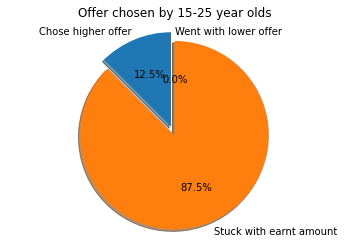

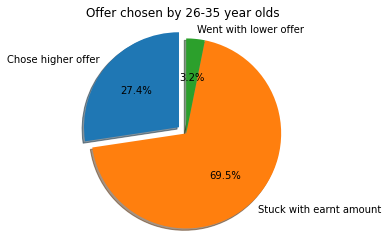

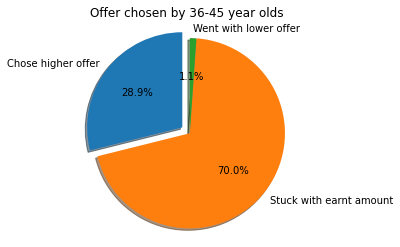

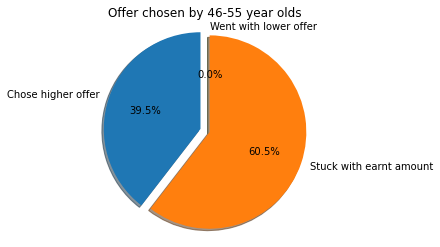

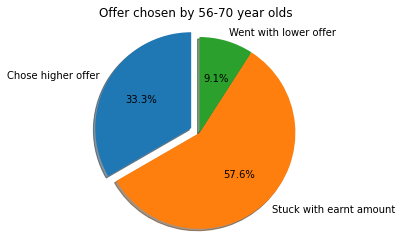

In [ ]:
sizes = []
for i in percents:
    sizes.append([i[0], 100 - i[0] - i[1], i[1]])

explode = (0.1, 0, 0)

for ind, j in enumerate(sizes):
    fig, ax = plt.subplots()
    ax.pie(j, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title("Offer chosen by {} year olds".format(ages[ind]))
    plt.show()

In [ ]:
num_data = team_data[['p_1_age', 'p_1_fast_round_sum', 'p_1_play_sum_chosen', 
                 'p_2_age', 'p_2_fast_round_sum', 'p_2_play_sum_chosen', 
                 'p_3_age', 'p_3_fast_round_sum', 'p_3_play_sum_chosen', 
                 'p_4_age', 'p_4_fast_round_sum', 'p_4_play_sum_chosen', 
                 'team_total_sum', 'question_answered']]

cat_data = team_data[['p_1_gender', 'p1_round_status',
                'p_2_gender', 'p_2_round_status',
                'p_3_gender', 'p_3_round_status',
                'p_4_gender', 'p_4_round_status',
                'game_result', 'season']]

In [ ]:
num_data.describe()

,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_3_age,p_3_fast_round_sum,p_3_play_sum_chosen,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,team_total_sum,question_answered
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,36.326733,30049.504950,56871.287129,35.861386,29059.405941,50881.188119,34.376238,27178.217822,54059.405941,37.643564,34653.465347,67544.554455,138306.930693,21.118812
std,10.445199,8817.455685,43295.649520,13.040728,10740.411335,41988.400095,10.886553,10281.435736,49440.433206,10.108001,9981.418380,55061.152322,66913.338368,3.589672
min,15.000000,10000.000000,3000.000000,16.000000,5000.000000,9000.000000,15.000000,5000.000000,5000.000000,17.000000,15000.000000,2000.000000,10000.000000,14.000000
25%,30.000000,25000.000000,25000.000000,27.000000,20000.000000,25000.000000,27.000000,20000.000000,25000.000000,31.000000,30000.000000,30000.000000,80000.000000,18.000000
50%,34.000000,30000.000000,35000.000000,32.000000,30000.000000,35000.000000,31.000000,30000.000000,30000.000000,35.000000,35000.000000,40000.000000,120000.000000,21.000000
75%,40.000000,35000.000000,100000.000000,44.000000,35000.000000,50000.000000,38.000000,35000.000000,50000.000000,41.000000,40000.000000,110000.000000,190000.000000,23.000000
max,67.000000,60000.000000,160000.000000,67.000000,60000.000000,170000.000000,65.000000,50000.000000,175000.000000,69.000000,55000.000000,220000.000000,290000.000000,31.000000


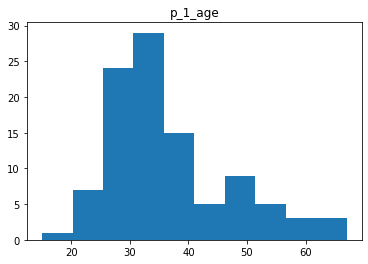

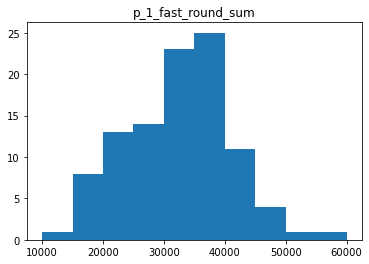

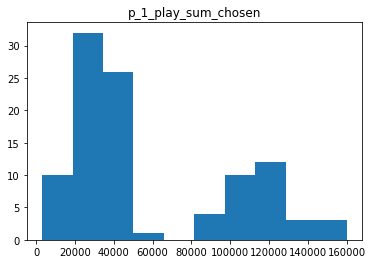

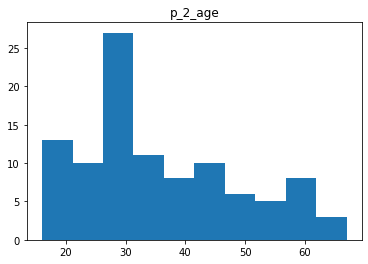

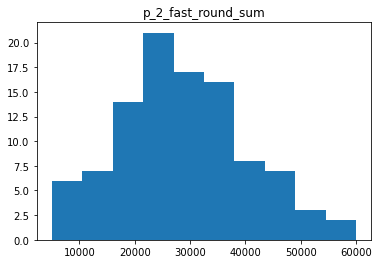

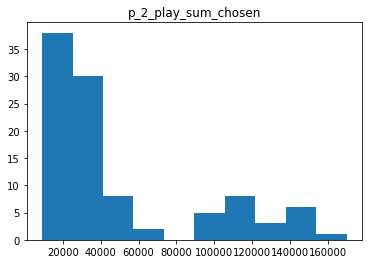

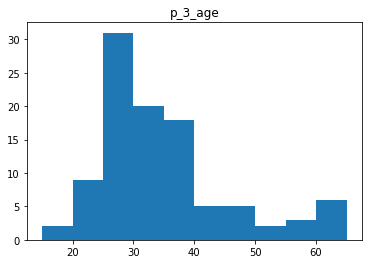

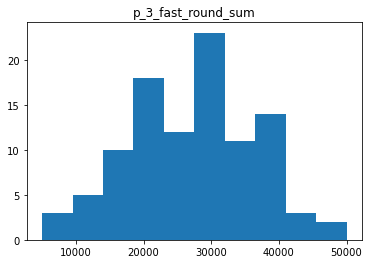

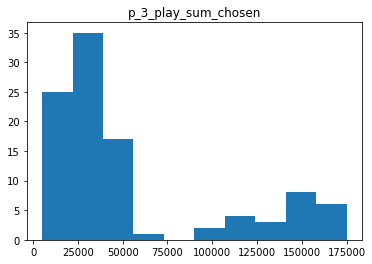

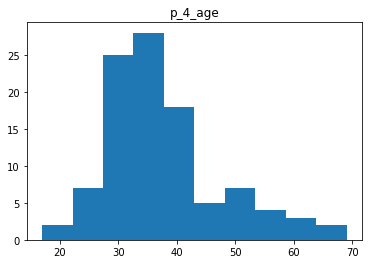

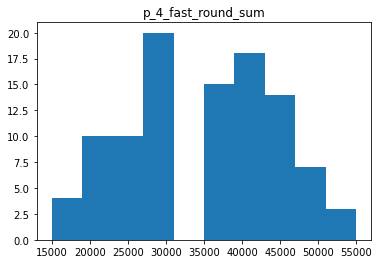

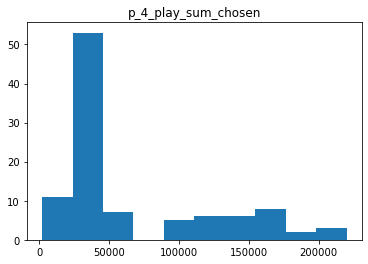

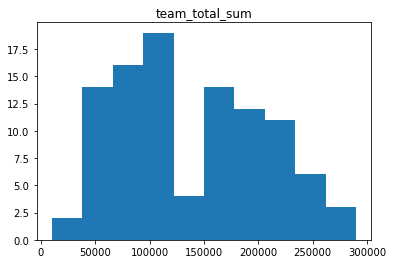

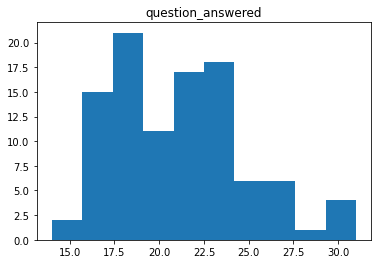

In [ ]:
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

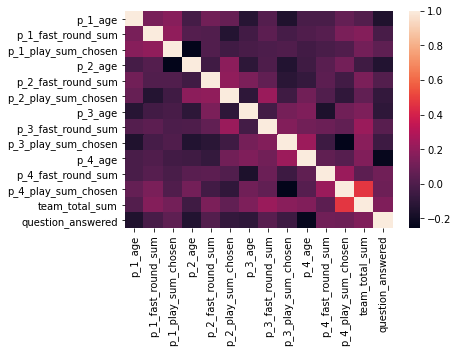

In [ ]:
sns.heatmap(num_data.corr())

In [ ]:
pd.pivot_table(team_data, index = 'game_result', values = ['p_1_age', 'p_1_fast_round_sum', 'p_1_play_sum_chosen', 
                                                           'p_2_age', 'p_2_fast_round_sum', 'p_2_play_sum_chosen', 
                                                           'p_3_age', 'p_3_fast_round_sum', 'p_3_play_sum_chosen',
                                                           'p_4_age', 'p_4_fast_round_sum', 'p_4_play_sum_chosen', 
                                                           'team_total_sum', 'question_answered'])

,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_3_age,p_3_fast_round_sum,p_3_play_sum_chosen,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,question_answered,team_total_sum
game_result,,,,,,,,,,,,,,
0,37.418919,30270.270270,57243.243243,37.472973,29054.054054,54986.486486,34.824324,27162.162162,55878.378378,38.513514,34729.729730,65445.945946,19.621622,132256.756757
1,33.333333,29444.444444,55851.851852,31.444444,29074.074074,39629.629630,33.148148,27222.222222,49074.074074,35.259259,34444.444444,73296.296296,25.222222,154888.888889


C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


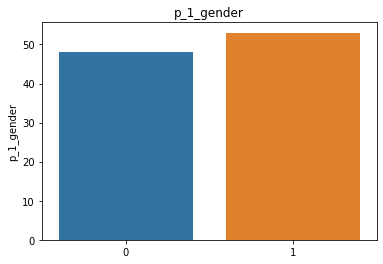

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


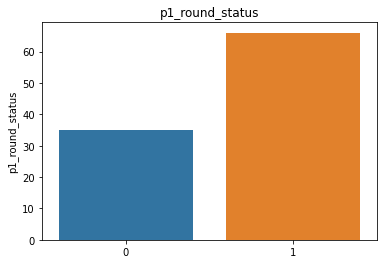

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


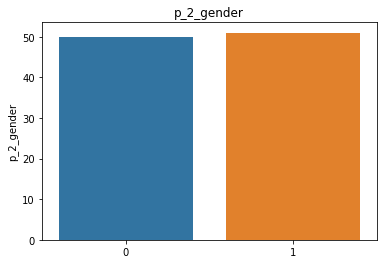

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


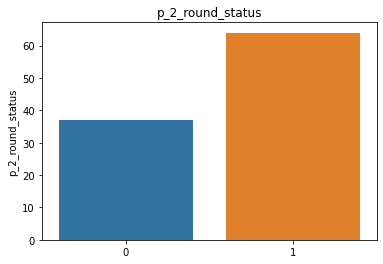

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


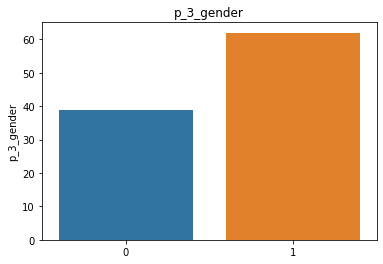

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


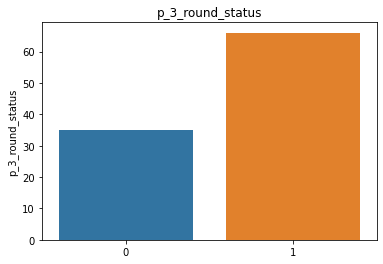

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


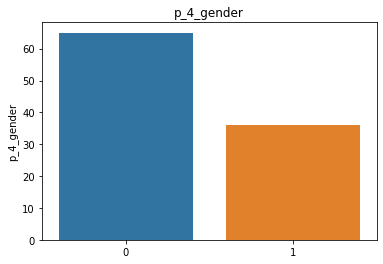

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


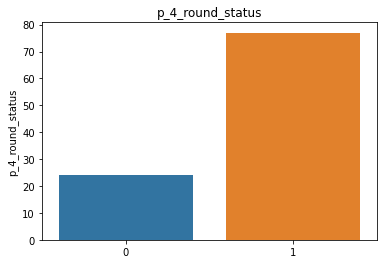

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


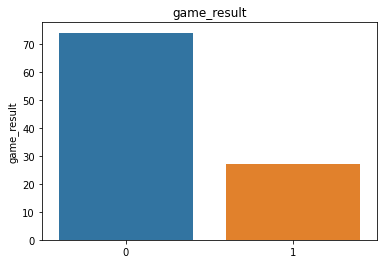

C:\Users\Sam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


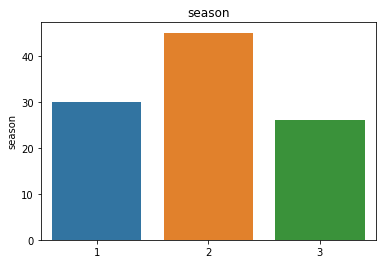

In [ ]:
for i in cat_data.columns:
    sns.barplot(cat_data[i].value_counts().index, cat_data[i].value_counts()).set_title(i)
    plt.show()